In [1]:
import numpy as np
import scipy
import time

In [2]:
from geneticalgorithm2 import geneticalgorithm2 as ga
from geneticalgorithm2 import AlgorithmParams
from OptimizationTestFunctions import Ackley, Rastrigin, Weierstrass, plot_3d


def vb_from_ga(vb, dim):
    return np.array([vb]*dim)

In [3]:
import random
import seaborn as sns
import warnings

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from umap import UMAP


warnings.filterwarnings("ignore")

%matplotlib inline

# Rastrigin

In [4]:
rastrigin_vb = [-5.12, 5.12]

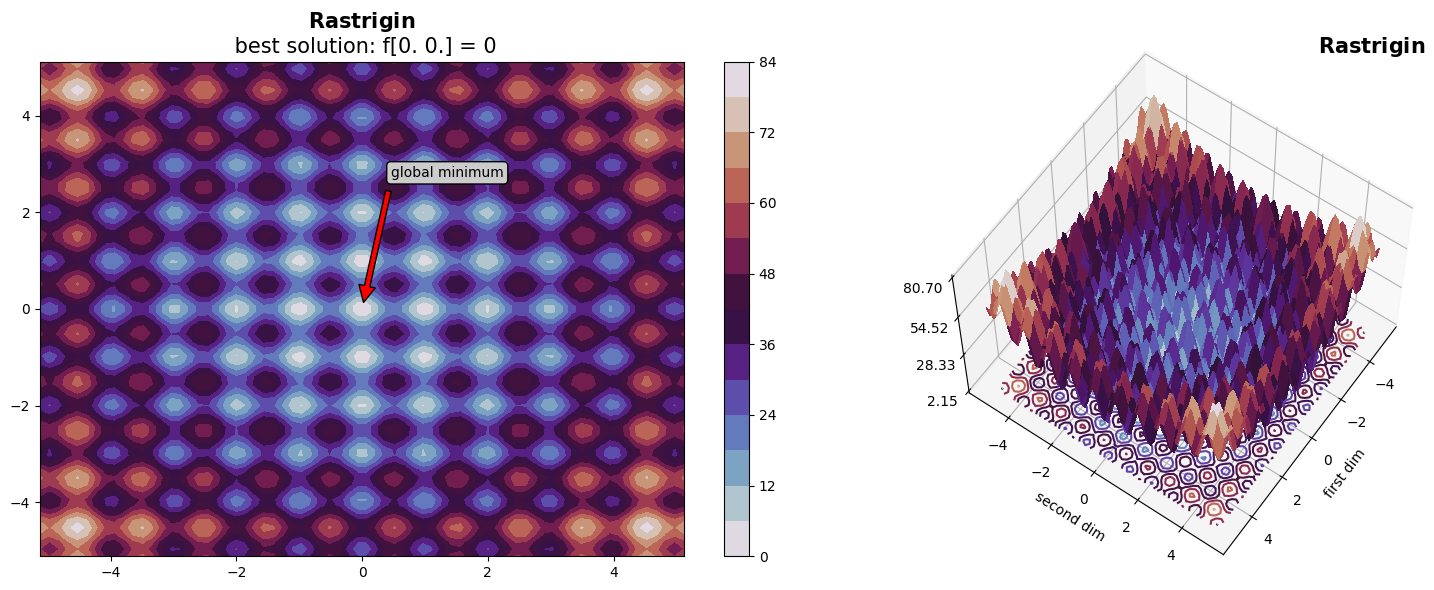

In [5]:
func = Rastrigin(dim=2)
plot_3d(func, 
        points_by_dim = 70, 
        title = fr"{type(func).__name__}",
        bounds = None, 
        show_best_if_exists = True, 
        cmap = 'twilight',
        plot_surface = True,
        plot_heatmap = True)

## Rastrigin GA

### Dimension 2


Average time of function evaluating (secs): 0.00029006481170654294 (total = 0.029006481170654297)

Best score before optimization: 4.3400161290215
                                                                                                                                                                                                        
 The best found solution:
 [0.00216958 0.0014942 ]

 Objective function:
 0.001376767337017526

 Used generations: 100
 Used time: 0.253 seconds


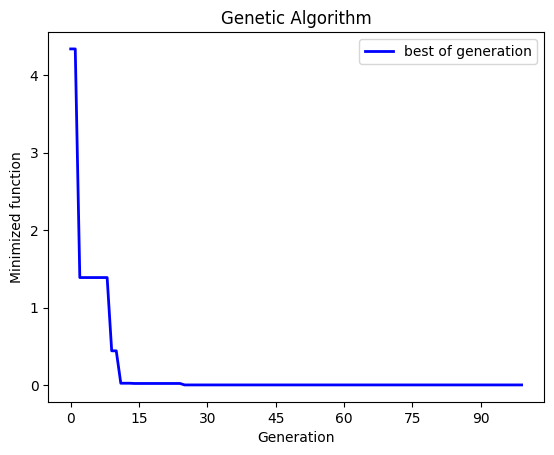

[0.00216958 0.0014942 ]
0.001376767337017526


In [6]:
func = Rastrigin(dim=2)
model_rastrigin = ga(func, 
                     dimension = 2, 
                     variable_type='real', 
                     variable_boundaries = vb_from_ga(rastrigin_vb, 2),
                     function_timeout = 10,
                     algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_rastrigin.run()

print(result.variable) # best solution
print(result.score) # best score

### Dimension 1


Average time of function evaluating (secs): 0.00032007694244384766 (total = 0.032007694244384766)

Best score before optimization: 0.06798669227504561
                                                                                                                                                                                                        
 The best found solution:
 [0.0018415]

 Objective function:
 0.0006727649717461759

 Used generations: 100
 Used time: 0.235 seconds


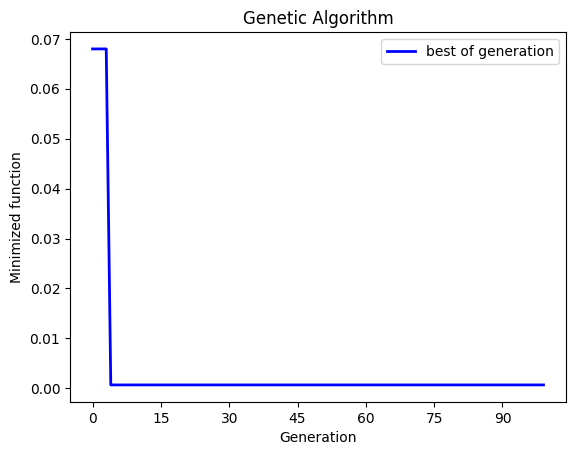

[0.0018415]
0.0006727649717461759


In [7]:
func = Rastrigin(dim=1)
model_rastrigin = ga(func, 
                     dimension = 1, 
                     variable_type='real', 
                     variable_boundaries = vb_from_ga(rastrigin_vb, 1),
                     function_timeout = 10,
                     algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_rastrigin.run()

print(result.variable) # best solution
print(result.score) # best score

## Rastrigin CG

In [8]:
func = Rastrigin(dim=1)
t = time.time()
result = scipy.optimize.minimize(func, rastrigin_vb, method='cg')
print(f'Time: {time.time() - t}')
result

Time: 0.0039997100830078125


     fun: 21.838487584923083
     jac: array([2.38418579e-07, 2.38418579e-07])
 message: 'Optimization terminated successfully.'
    nfev: 56
     nit: 4
    njev: 18
  status: 0
 success: True
       x: array([-3.97978387,  3.97978385])

# Ackley

In [9]:
ackley_vb = [-32.768,32.768]

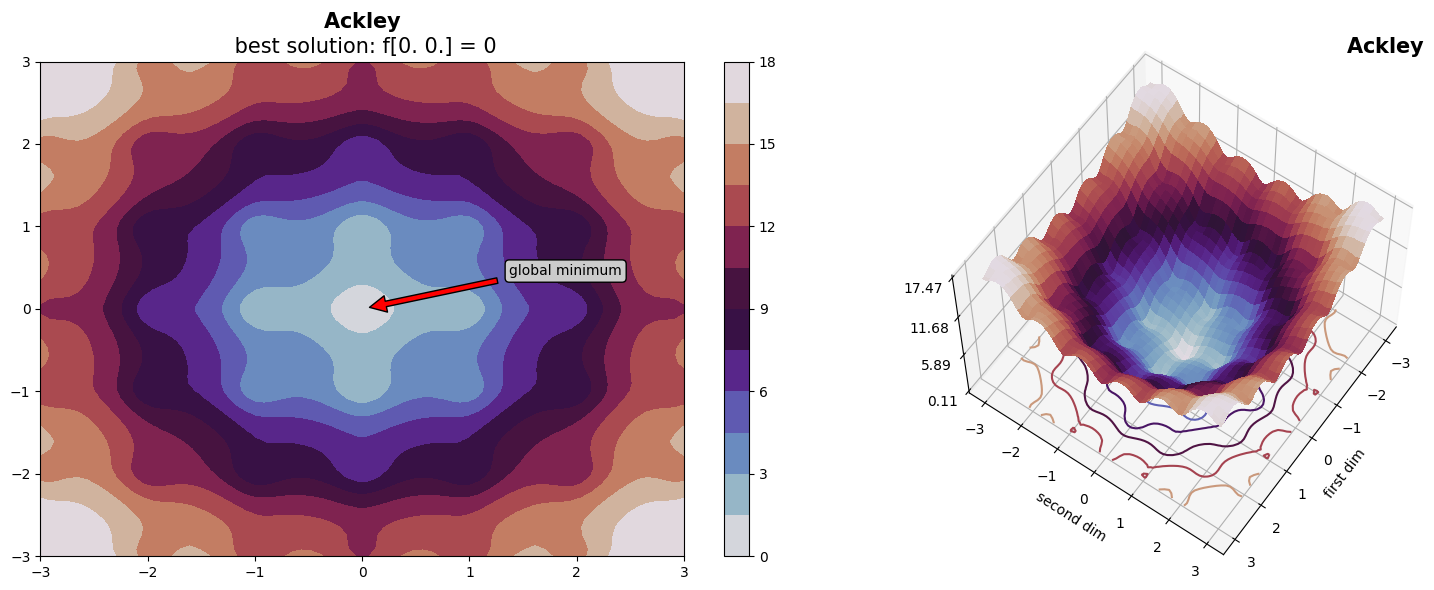

In [10]:
func = Ackley(dim=2)
plot_3d(func, 
        points_by_dim = 70, 
        title = fr"{type(func).__name__}",
        bounds = None, 
        show_best_if_exists = True, 
        cmap = 'twilight',
        plot_surface = True,
        plot_heatmap = True)

## Ackley GA

### Dimension 2


Average time of function evaluating (secs): 0.0002800726890563965 (total = 0.02800726890563965)

Best score before optimization: 3.5214688078596077
                                                                                                                                                                                                        
 The best found solution:
 [ 3.84983981e-05 -5.84279018e-02]

 Objective function:
 0.09589771163746441

 Used generations: 100
 Used time: 0.247 seconds


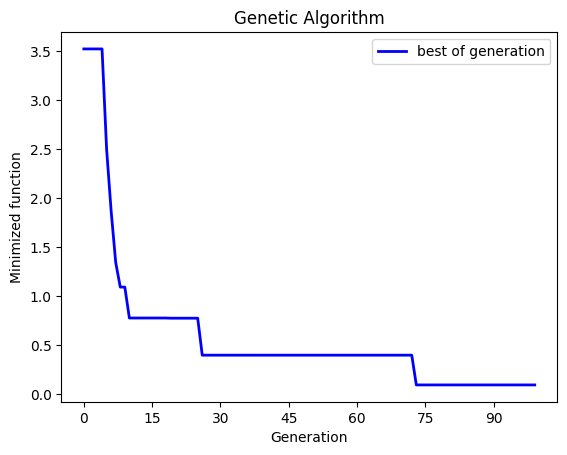

[ 3.84983981e-05 -5.84279018e-02]
0.09589771163746441


In [11]:
func = Ackley(dim=2)
model_ackley = ga(func, 
                  dimension = 2, 
                  variable_type='real', 
                  variable_boundaries = vb_from_ga(ackley_vb, dim=2),
                  function_timeout = 10,
                  algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_ackley.run()

print(result.variable) # best solution
print(result.score) # best score

### Dimension 1


Average time of function evaluating (secs): 0.000290067195892334 (total = 0.0290067195892334)

Best score before optimization: 2.502020795016348
                                                                                                                                                                                                        
 The best found solution:
 [0.00016825]

 Objective function:
 1.632150781638586e-06

 Used generations: 100
 Used time: 0.235 seconds


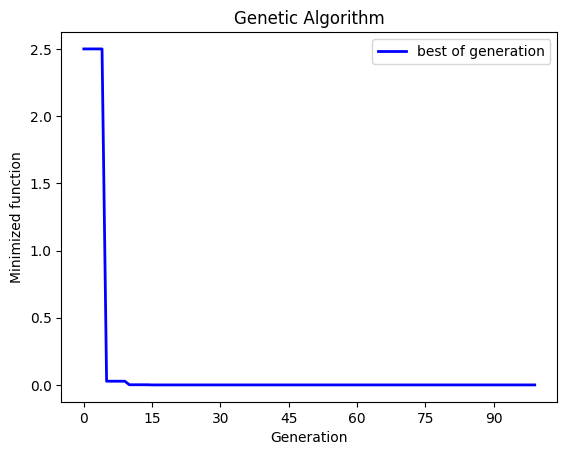

[0.00016825]
1.632150781638586e-06


In [12]:
func = Ackley(dim=1)
model_ackley = ga(func, 
                  dimension = 1, 
                  variable_type='real', 
                  variable_boundaries = vb_from_ga(ackley_vb, dim=1),
                  function_timeout = 10,
                  algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_ackley.run()

print(result.variable) # best solution
print(result.score) # best score

## Ackley CG

In [13]:
func = Ackley(dim=1)
t = time.time()
result = scipy.optimize.minimize(func, ackley_vb, method='cg')
print(f'Time: {time.time() - t}')
result

Time: 0.0040013790130615234


     fun: 20.000000000000004
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([-33.00000001,  32.99999999])

# Weierstrass

In [14]:
weierstrass_vb = [-0.5,0.5]

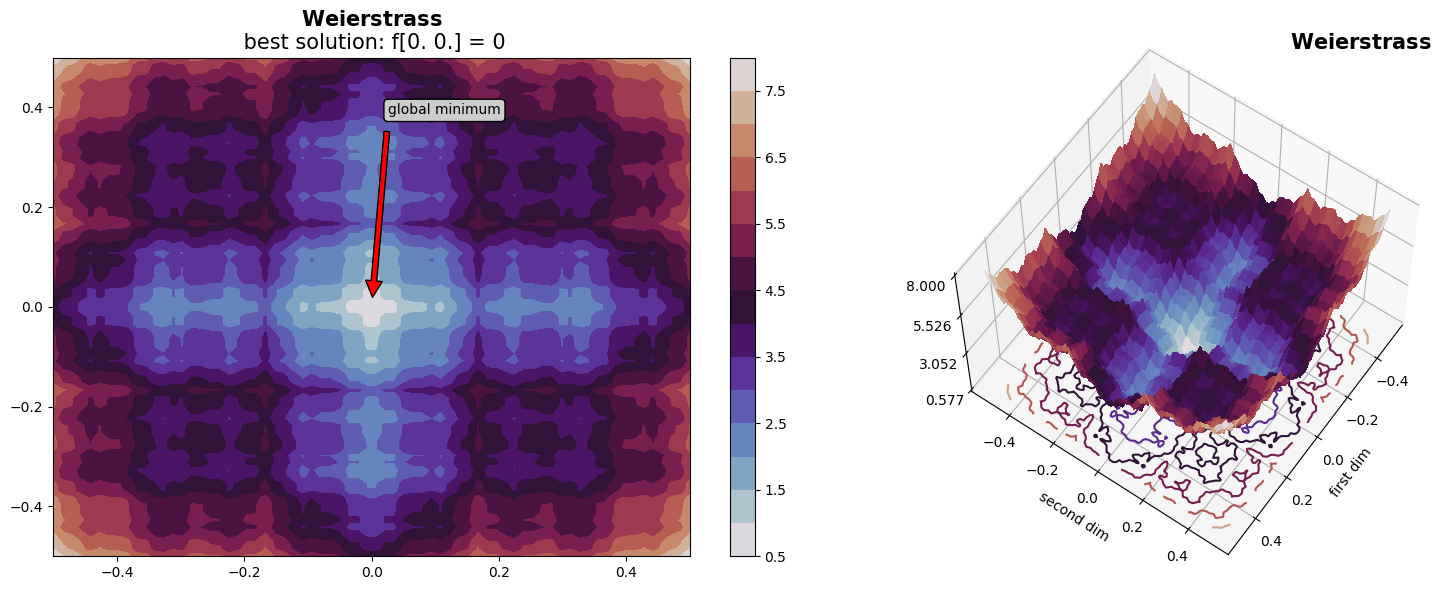

In [15]:
func = Weierstrass(dim=2)
plot_3d(func,
        points_by_dim = 70, 
        title = fr"{type(func).__name__}",
        bounds = None, 
        show_best_if_exists = True, 
        cmap = 'twilight',
        plot_surface = True,
        plot_heatmap = True)

## Weierstrass GA

### Dimension 2


Average time of function evaluating (secs): 0.00035007953643798826 (total = 0.03500795364379883)

Best score before optimization: 1.7382537566290819
                                                                                                                                                                                                        
 The best found solution:
 [1.71596891e-04 6.20183287e-05]

 Objective function:
 0.039429026013549695

 Used generations: 100
 Used time: 0.454 seconds


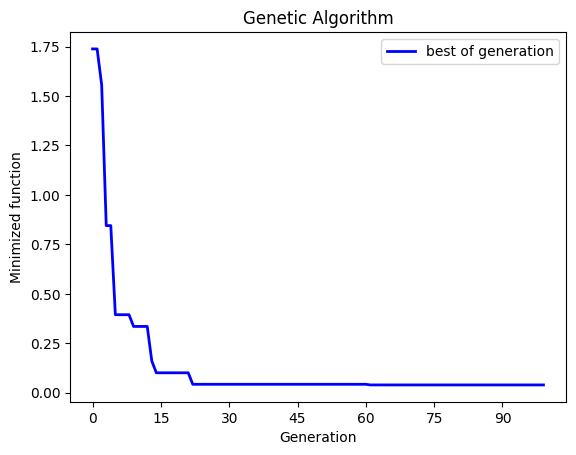

[1.71596891e-04 6.20183287e-05]
0.039429026013549695


In [16]:
func = Weierstrass(dim=2)
model_rastrigin = ga(func, 
                     dimension = 2, 
                     variable_type='real', 
                     variable_boundaries = vb_from_ga(weierstrass_vb, 2),
                     function_timeout = 10,
                     algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_rastrigin.run()

print(result.variable) # best solution
print(result.score) # best score

### Dimension 1


Average time of function evaluating (secs): 0.0003200531005859375 (total = 0.03200531005859375)

Best score before optimization: 0.14952811357956564
                                                                                                                                                                                                        
 The best found solution:
 [0.000182]

 Objective function:
 0.028991934310399925

 Used generations: 100
 Used time: 0.352 seconds


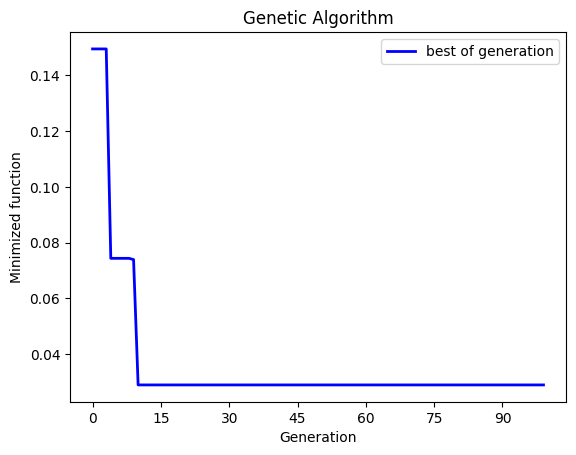

[0.000182]
0.028991934310399925


In [17]:
func = Weierstrass(dim=1)
model_rastrigin = ga(func, 
                     dimension = 1, 
                     variable_type='real', 
                     variable_boundaries = vb_from_ga(weierstrass_vb, 1),
                     function_timeout = 10,
                     algorithm_parameters=AlgorithmParams(max_num_iteration=100))
result = model_rastrigin.run()

print(result.variable) # best solution
print(result.score) # best score

## Weierstrass CG

In [18]:
func = Weierstrass(dim=1)
t = time.time()
result = scipy.optimize.minimize(func, weierstrass_vb, method='cg')
print(f'Time: {time.time() - t}')
result

Time: 0.012002229690551758


     fun: 0.21053314550097824
     jac: array([-1108.92238678,  -133.77396542])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 112
     nit: 2
    njev: 34
  status: 2
 success: False
       x: array([0.06417727, 1.06952907])

# Task 2

In [19]:
def read_data(filename: str, delimeter=';'):
    with open(filename, mode="r", newline='') as f:
        features = list()
        targets = list()
        for row in f:
            line = list()
            for s in row.split(delimeter):
                s = s.strip()
                if s:
                    line.append(s)
            
            t = int(line[-1])
            if t < 3:
                features.append(list(map(float ,line[1:-1])))
                targets.append(t-1)
            if t == 6:
                features.append(list(map(float ,line[1:-1])))
                targets.append(2)
            if t == 7:
                features.append(list(map(float ,line[1:-1])))
                targets.append(3)
    return features, targets

In [20]:
def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        return xx, yy

def plot_contours(model, xx, yy, ax, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_surface(model, xx, yy, ax, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.plot_surface(xx, yy, Z, **params)
    return out

In [21]:
def plot_results(features, targets, model, figsize=(10, 5), in3d=False):
    xx, yy = make_meshgrid(features[:, 0], features[:, 1])

    fig = plt.figure(figsize=(15, 15))
    
    if in3d:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
    else:
        ax = fig.gca()
    colormap = 'coolwarm'
    labels = np.unique(targets).tolist()
    palette = np.array(sns.color_palette(colormap, n_colors=len(labels)))
    cmap = sns.color_palette(colormap, as_cmap=True)

    patchs = []
    for i, color in enumerate(palette):
        patchs.append(mpatches.Patch(color=color, label=i))
    if in3d:
        plot_surface(model, xx, yy, ax, cmap=cmap, alpha=0.8)
    else:
        plot_contours(model, xx, yy, ax, cmap=cmap, alpha=0.8)
    plt.scatter(features[:, 0], features[:, 1], c=targets, cmap=cmap, s=40, edgecolors='k')
    # plt.xticks(())
    # plt.yticks(())
    plt.axis('off')
    # plt.legend(handles=patchs, loc='upper right')
    plt.show()

In [22]:
features, targets = read_data('glass.data', delimeter=',')
features = np.array(features)
targets = np.array(targets)

In [23]:
features = UMAP().fit_transform(features)
features = StandardScaler().fit_transform(features)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, stratify=targets, shuffle=True)
x_train.shape, x_test.shape

((128, 2), (56, 2))

## SVM

In [25]:
svc_parameters = {
    'kernel':['poly', 'rbf', 'sigmoid'],
    'C': np.linspace(1, 10, 11),
    'degree': np.linspace(3, 6, 4)
}

svc_vb = np.array([[0, len(svc_parameters['kernel']) - 1],
                   [0, len(svc_parameters['C']) - 1],
                   [0, len(svc_parameters['degree']) - 1]])

def func(X):
    local_parameters = {
        'kernel': svc_parameters['kernel'][int(X[0])],
        'C': svc_parameters['C'][int(X[1])],
        'degree': svc_parameters['degree'][int(X[2])]
    }
    model = SVC(**local_parameters)
    model.fit(x_train, y_train)
    return model

def func_ga(X):
    return func(X).score(x_test, y_test) * -1


Average time of function evaluating (secs): 0.004231247901916504 (total = 0.4231247901916504)

Best score before optimization: -0.8214285714285714
                                                                                                                                                                                                        
 The best found solution:
 [ 1. 10.  3.]

 Objective function:
 -0.8214285714285714

 Used generations: 45
 Used time: 11.4 seconds


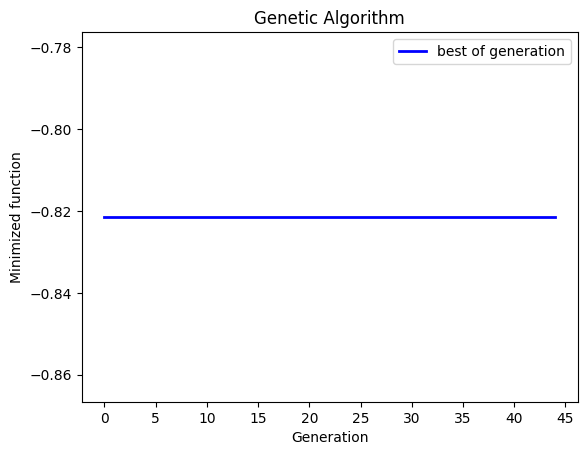

In [26]:
model_svc = ga(func_ga, 
               dimension = 3, 
               variable_type='int', 
               variable_boundaries = svc_vb,
               function_timeout = 10,
               algorithm_parameters=AlgorithmParams())
result = model_svc.run()

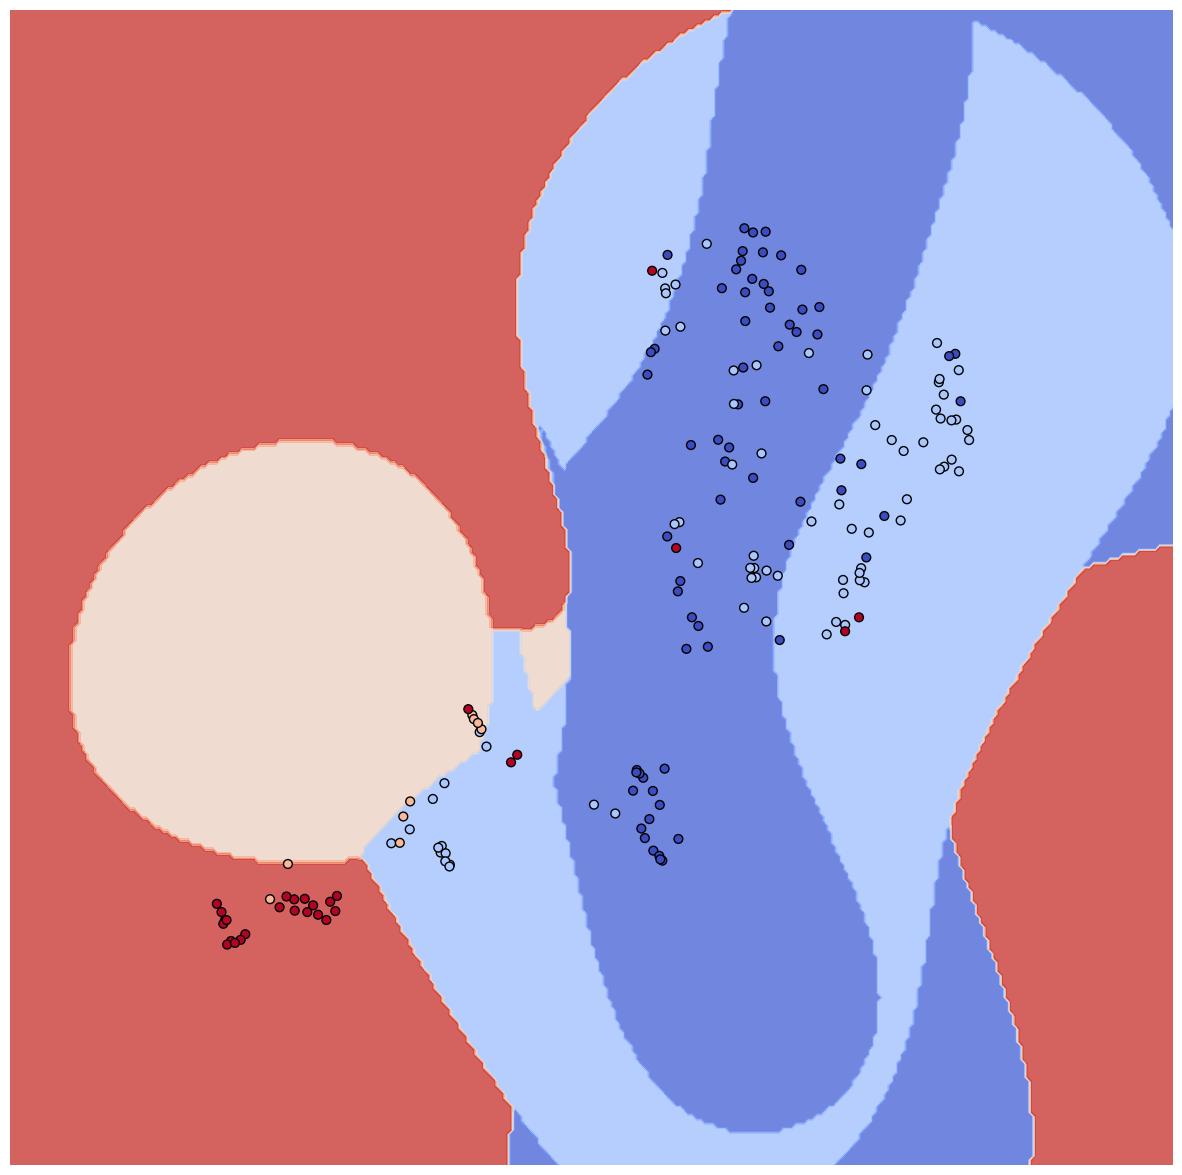

In [27]:
plot_results(features, targets, func(result.variable), figsize=(15, 10))

<Figure size 1500x1500 with 0 Axes>

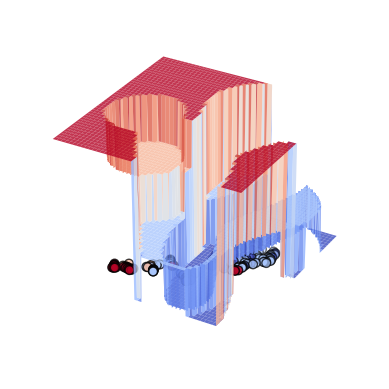

In [28]:
plot_results(features, targets, func(result.variable), figsize=(13, 13), in3d=True)

## KNN

In [29]:
knn_parameters = {
    'n_neighbors': np.linspace(5, 15, 10, dtype=np.int32),
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['distance', 'uniform'],
    'p': [1, 2]
}

knn_vb = np.array([[0, len(knn_parameters['n_neighbors']) - 1],
                   [0, len(knn_parameters['algorithm']) - 1],
                   [0, len(knn_parameters['weights']) - 1], 
                   [0, len(knn_parameters['p']) - 1]])

def func(X):
    local_parameters = {
        'n_neighbors': knn_parameters['n_neighbors'][int(X[0])],
        'algorithm': knn_parameters['algorithm'][int(X[1])],
        'weights': knn_parameters['weights'][int(X[2])],
        'p': knn_parameters['p'][int(X[3])]
    }
    model = KNeighborsClassifier(**local_parameters)
    model.fit(x_train, y_train)
    return model

def func_ga(X):
    return func(X).score(x_test, y_test) * -1


Average time of function evaluating (secs): 0.002370576858520508 (total = 0.23705768585205078)

Best score before optimization: -0.8571428571428571
                                                                                                                                                                                                        
 The best found solution:
 [8. 1. 0. 1.]

 Objective function:
 -0.8571428571428571

 Used generations: 52
 Used time: 6.18 seconds


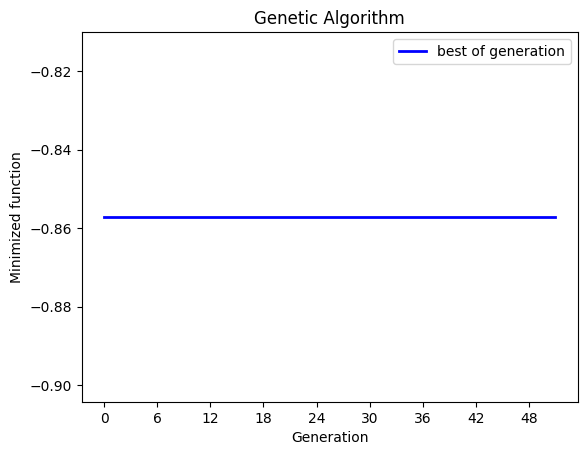

In [30]:
model_knn = ga(func_ga, 
               dimension = 4, 
               variable_type='int', 
               variable_boundaries = knn_vb,
               function_timeout = 10,
               algorithm_parameters=AlgorithmParams())
result = model_knn.run()

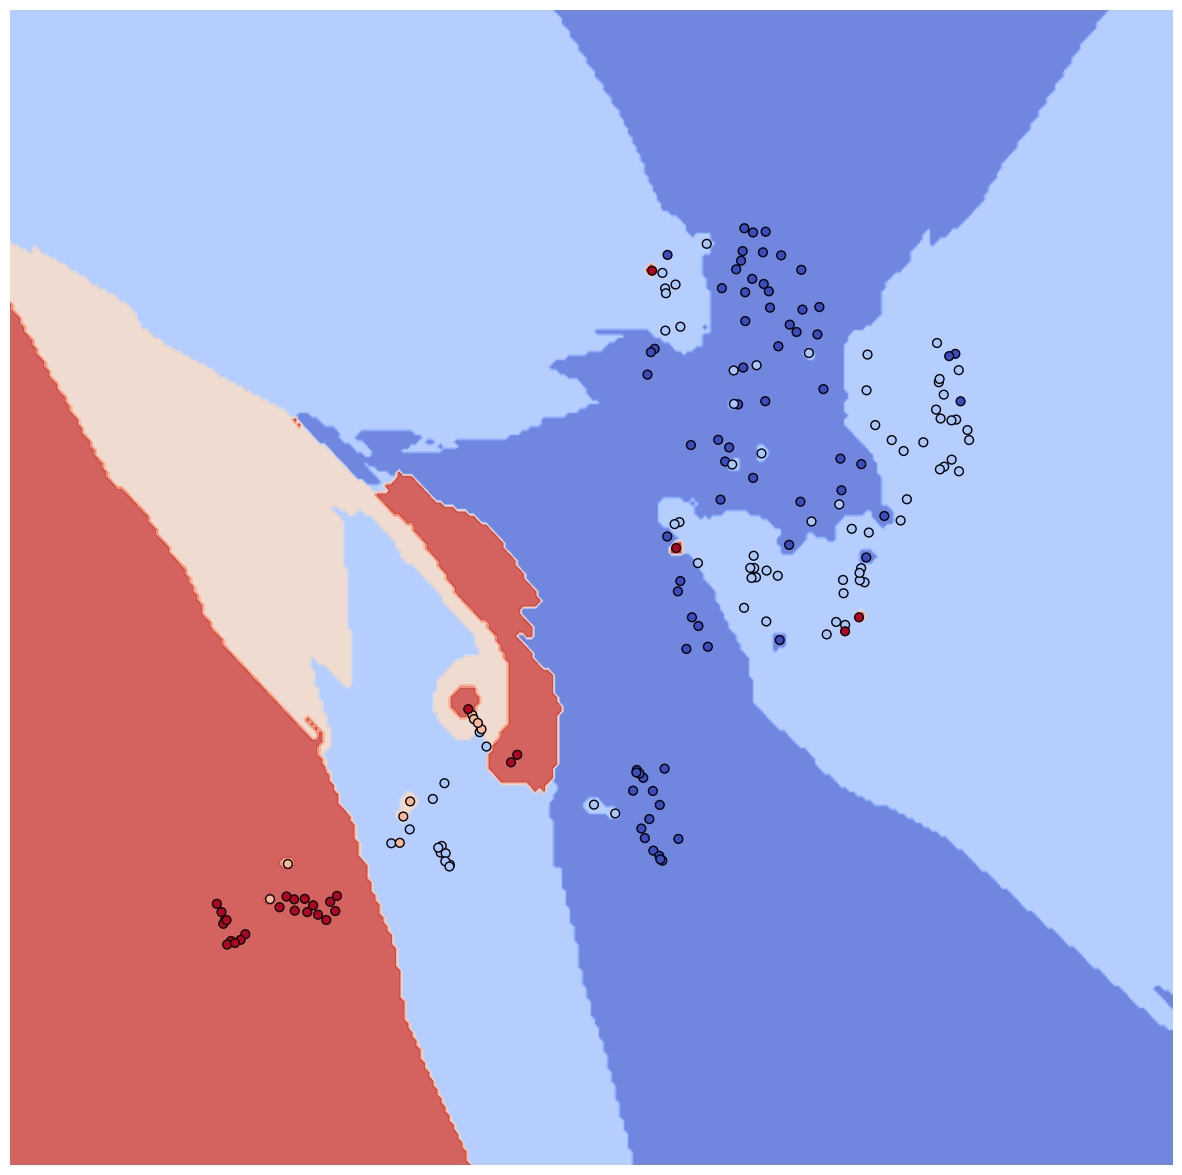

In [31]:
plot_results(features, targets, func(result.variable), figsize=(15, 10))

<Figure size 1500x1500 with 0 Axes>

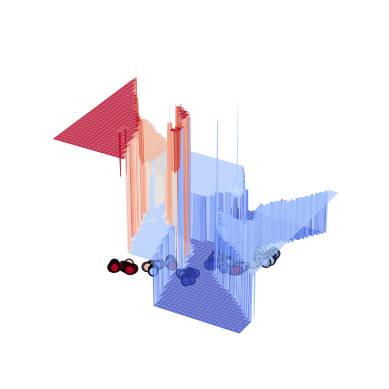

In [32]:
plot_results(features, targets, func(result.variable), figsize=(13, 13), in3d=True)

## RandomForest

In [33]:
rf_parameters = {
    'n_estimators': np.linspace(5, 50, 10, dtype=np.int32),
    'criterion': ['gini', 'entropy'],
    'max_depth': np.linspace(5, 10, 5, dtype=np.int32),
}

rf_vb = np.array([[0, len(rf_parameters['n_estimators']) - 1],
                   [0, len(rf_parameters['criterion']) - 1],
                   [0, len(rf_parameters['max_depth']) - 1]])

def func(X):
    local_parameters = {
        'n_estimators': rf_parameters['n_estimators'][int(X[0])],
        'criterion': rf_parameters['criterion'][int(X[1])],
        'max_depth': rf_parameters['max_depth'][int(X[2])]
    }
    model = RandomForestClassifier(**local_parameters)
    model.fit(x_train, y_train)
    return model

def func_ga(X):
    return func(X).score(x_test, y_test) * -1


Average time of function evaluating (secs): 0.03299076318740845 (total = 3.2990763187408447)

Best score before optimization: -0.8571428571428571
                                                                                                                                                                                                        
 The best found solution:
 [0. 0. 3.]

 Objective function:
 -0.8928571428571429

 Used generations: 42
 Used time: 96.7 seconds


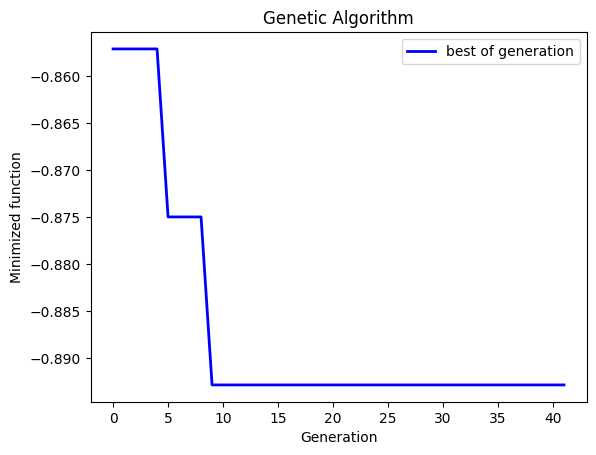

In [34]:
model_rf = ga(func_ga, 
               dimension = 3, 
               variable_type='int', 
               variable_boundaries = rf_vb,
               function_timeout = 10,
               algorithm_parameters=AlgorithmParams())
result = model_rf.run()

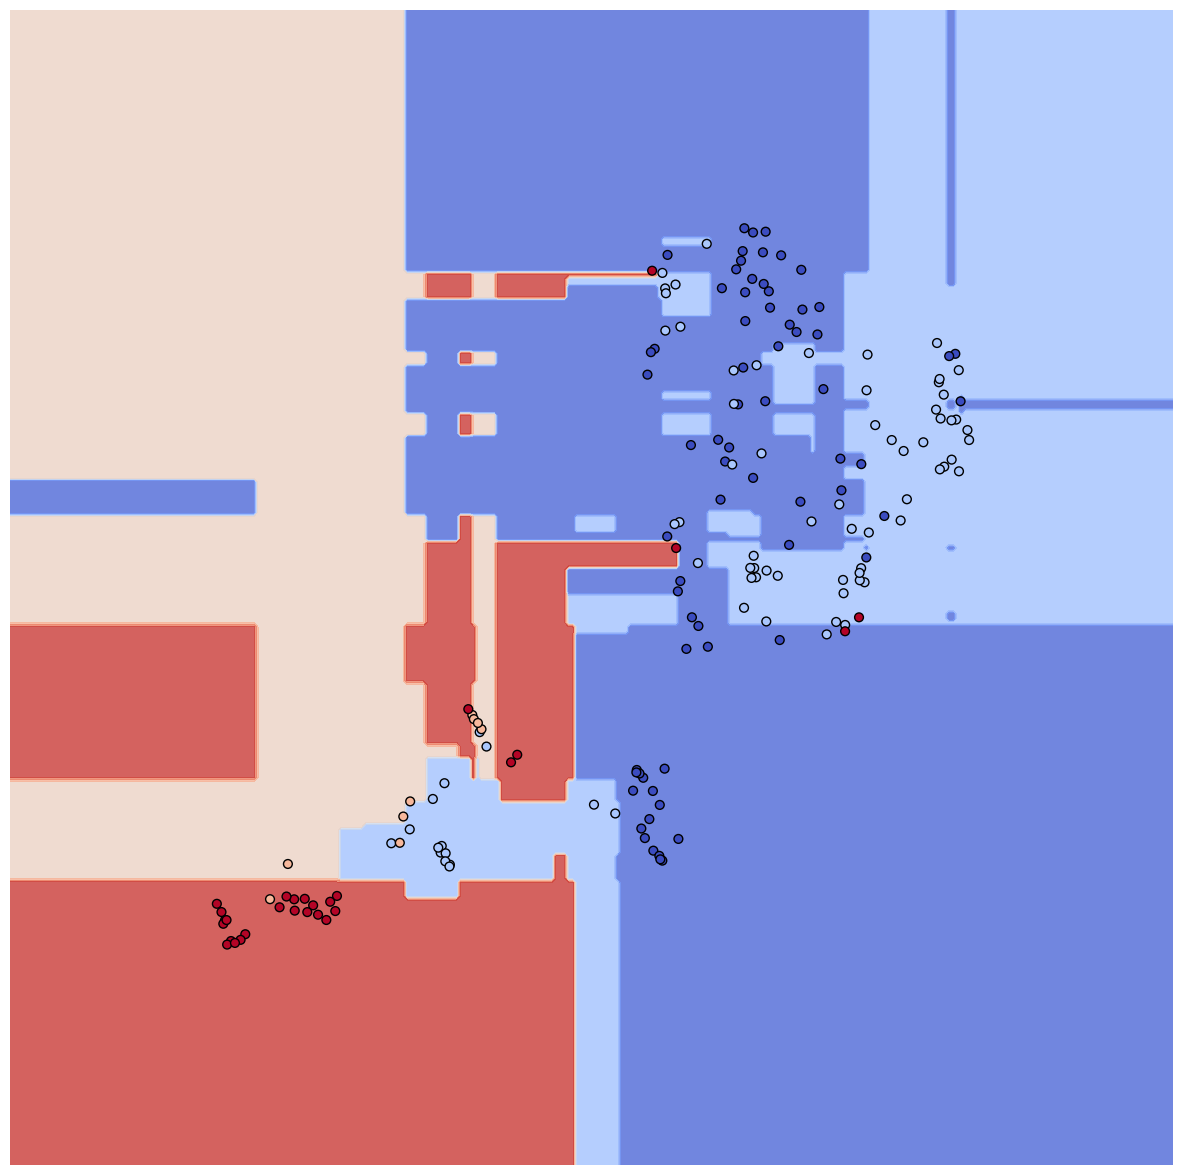

In [35]:
plot_results(features, targets, func(result.variable), figsize=(15, 10))

<Figure size 1500x1500 with 0 Axes>

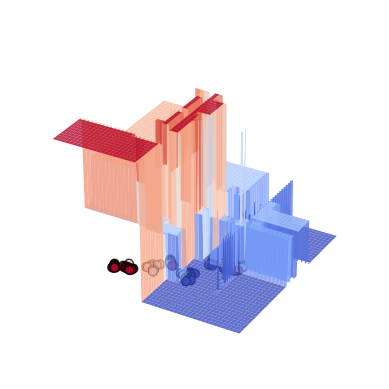

In [36]:
plot_results(features, targets, func(result.variable), figsize=(13, 13), in3d=True)